---
---

# Clustering traveler profiles based on destinations preferences
---
---

# Preliminaries
---

## Pitch Summary
<div class="alert alert-block alert-warning">
Present a short summary of the pitch!

(Up to 5 bullet points, this cell)
</div>

* **Problem**: Travel agencies and tourism boards often struggle while delivering personalized recommendations due to the diverse traveler preferences.
* **Goal**: Find traveler profiles using clustering techniques based on their destinations reviews.
* **Expected Value**: Improved personalized recommendations, better resource allocation, and enhanced customer satisfaction and loyalty.

## Dataset Reference

<div class="alert alert-block alert-warning">
Present the origin of the dataset, including e.g.
    
* the source where you got it from (link to the repository),
* the author(s),
* the license,
* the purpose for which it was collected!

(Text/bullet points, this cell)
</div>

* **Data reference**: https://archive.ics.uci.edu/dataset/484/travel+reviews
* **Author**: Shini Renjith
* **Licence**: Creative Commons Attibution 4.0 International
* **Dataset**: It contains reviews from TripAdvisor on destinations in 10 categories across East Asia. Each traveler rating is mapped as Excellent(4), Very Good(3), Average(2), Poor(1), and Terrible(0) and average rating is used.
* **Purpose**: The main porpose for collecting this data, it is watching the feedback of others tourist, so future tourists can decide what places are worthy.

## Dataset Suitability

<div class="alert alert-block alert-warning">
Explain why the dataset is suitable for the pitched task!
    
(Up to 3 bullet points, this cell)
</div>

* **Quantificable**:  Ratings provide us a quantificable measure of the user opinion. This scale suits perfectly in clustering methods since it is a numerical variable where we can apply differents clustering methods easily.
* **Coverage**: It gathers a variety of travelers opinions across different venues, offering us a complete view of users preferences.
* **Relevance**: The dataset represents what tourists enjoy or dislike, which is fundamental at the time of segmenting them into profiles.


# Imports and Settings
---
<div class="alert alert-block alert-warning">
Use the following code cell to organize all imports and global settings.
Do not remove the pandas option.
    
(Commented code, in the next cell)
</div>

In [1]:
import pandas as pd
# make pandas display ALL columns of a dataframe
pd.options.display.max_columns = None
# Stardard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# K-Means
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
# Scalar data
from sklearn.preprocessing import StandardScaler
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn import cluster
# PCA
from sklearn.decomposition import PCA

# The Data
---

## The Raw Data
<div class="alert alert-block alert-warning"> 
Load the data and present a couple of samples. Call the dataset variable "raw".

(Commented code, add cells)
</div>


In [2]:
#Load the data from the csv file
raw = pd.read_csv("tripadvisor_review.csv")

#Show couple of samples
raw.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


<div class="alert alert-block alert-warning"> 
Explain the dataset with all its features.
    
* The features should be described in the following table. The range is the set of possible values that a feature can take, e.g. "red, green, blue", "$\mathbb{R}$", "$1,2,...,12$".
* You may describe each feature individually or groups of features, if many features are similar (whatever is easier to explain.)

(Text/bullet points + table, this cell)
</div>


**Columns Explanation**


| Feature | Range  | Explanation |
|---------|--------|-------------|
|User ID  | 'User N'|ID attribute of each row  |
|Category 1  |[0,4] |Average user feedback on art galleries  |
|Category 2  |[0,4] |Average user feedback on dance clubs  |
|Category 3  |[0,4] |Average user feedback on juice bars  |
|Category 4  |[0,4] |Average user feedback on restaurants  |
|Category 5  |[0,4] |Average user feedback on museums  |
|Category 6  |[0,4] |Average user feedback on resorts  |
|Category 7  |[0,4] |Average user feedback on parks/picnic spots  |
|Category 8  |[0,4] |Average user feedback on beaches  |
|Category 9  |[0,4] |Average user feedback on theaters  |
|Category 10 |[0,4] |Average user feedback on religious institutions  |

* Their unit is rated in a scale from 0 to 4 (Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0))

<div class="alert alert-block alert-warning"> 
<b>Initial Data Analysis (IDA)</b>: Present relevant quantities about the data.
    
(Commented Code + text/bullet points, add cells)
</div>

In [3]:
# Number of rows and columns
raw.shape

(980, 11)

- The dataset has 980 rows and 11 columns
- But there is one column that is no an actual feature that not provides any useful data, 'User ID'.

In [4]:
# Description of the dataframe
raw.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


- **Category 7 (Parks/Picnics Spots)**: This category has the highest average among all categories, with a **mean** of 3.18 and very low **deviation** 0.0078.
- **Category 8 (Beaches)**: Second highest **mean** 2.83 and low **desviation** of 0.14.
- **Category 10 (Religious Institutions)**: Relatively high **mean** with 2.799 and relatively low **desviation**, 0.32. As we can see the locations with good reviews trend to have a consistent user feedback.
- **Category 4 (Restaurants)**: On the other hand, this category has the lowest **mean** of all categories 0.53 and a **75% percentile** of 0.58.
- **Category 3 (Juice Bars)**: This category has one of the lowest **means**, 1.01, and a great **desviation**, 0.78.

## Preprocessing

<div class="alert alert-block alert-warning"> 
<b>Initial Data Analysis (IDA)</b>: 
Conduct necessary analyses of the data quality and transform the data as needed.
Explain the necessity for transformations!
    
(Commented code + text/bullet points, add cells)
</div>

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


- All the columns are with a numeric unit so we don't have to worry about any convertion.
- And there is no missing values that we have to worry about.

In [6]:
# Dictionary with the original names of the categories and renaming the columns
real_names = {"Category 1":"art_galleries","Category 2":"dance_clubs","Category 3":"juice_bars","Category 4":"restaurants","Category 5":"museums","Category 6":"resorts","Category 7":"parks","Category 8":"beaches","Category 9":"theaters","Category 10":"religious_institutions"}
raw = raw.rename(columns=real_names)

# Dropping column 'User ID'
raw = raw.drop(columns="User ID")

raw.head()

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks,beaches,theaters,religious_institutions
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


- Since the categories aren't named, we have to rename according to the documentation their category because it might be confusing.
- And there is a column that is no a real feature that is the 'User ID', so we are going to drop it.

<div class="alert alert-block alert-warning"> 
Call the final dataset "data" and present a couple of samples.

(Commented code, add a cell)
</div>

In [7]:
# Copying the raw data
data = raw.copy()

data.head()

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks,beaches,theaters,religious_institutions
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


<div class="alert alert-block alert-warning"> 
<b>Initial Data Analysis (IDA)</b>: Present relevant quantities about the transformed data.
    
(Commented Code + text/bullet points, add cells)
</div>

- Since there have been no categorical features it has not been possible to make conversions into numerical features. Therefore, there has not been any significant change within the dataframe.
- In addition, there aren't missing values in any observation. Therefore, no rows had to be dropped.
- So due to this reasons, all rows have been kept intact and we have only had to change the column names for better compression.

# Exploratory Data Analysis (EDA) 
---

<div class="alert alert-block alert-warning"> 
Present 3 highlights from the exploratory data analysis (Task 4).

(Commented code + text/bullet points, add cells)

##### Statistics analysis

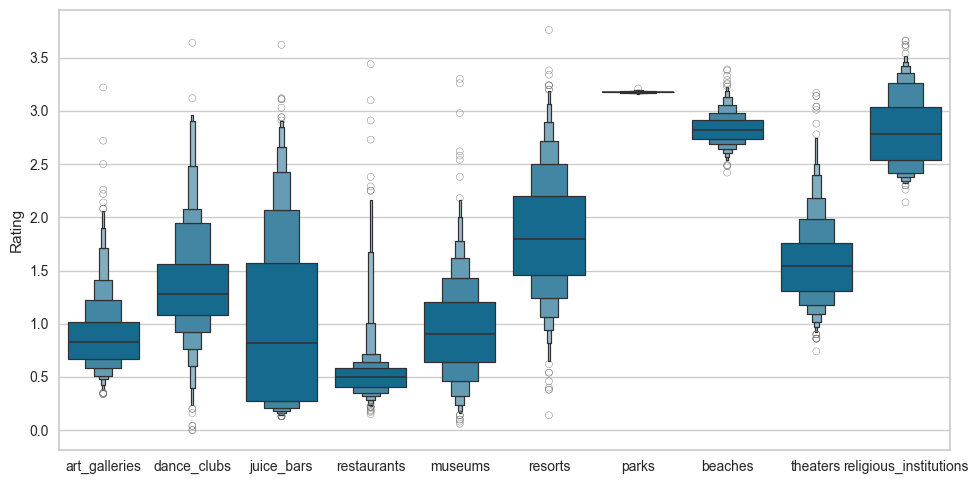

In [8]:
df_melted = pd.melt(data,value_vars=['art_galleries','dance_clubs','juice_bars','restaurants','museums','resorts','parks','beaches','theaters','religious_institutions'])
fig = plt.figure(figsize= (10,5))
boxplot = sns.boxenplot(x='variable',y='value',data=df_melted)
boxplot.set_xlabel("")
boxplot.set_ylabel("Rating")
fig.tight_layout()

- **juice_bars** has the widest spread, ranging around 0.3 to 1.5. This indicates a large variance
- With **restaurants** also happens the same, but only with the 75% percentile that has a wide range.
- **dance_clubs** and **theaters** also have high variability but have a more compact range compared to juice_bars
- **parks** shows an extremely narrow distribution, so the reviews are gonna be very similar.
- **beaches** also has a narrow distribution, but no so extreme as the previous one.
- **beaches** and **religious_institutions** have good mean ratings around 3.0, meaning good satisfaction
- On the other hand, it happens the opposite with **restaurants** and **art_galleries** with a median around the 0.5, terrible satisfaction.

- In all the categories with have a notable amount of **outliers**. Extreme ratings that very different of the perspective of the rest

#### Distribution analysis

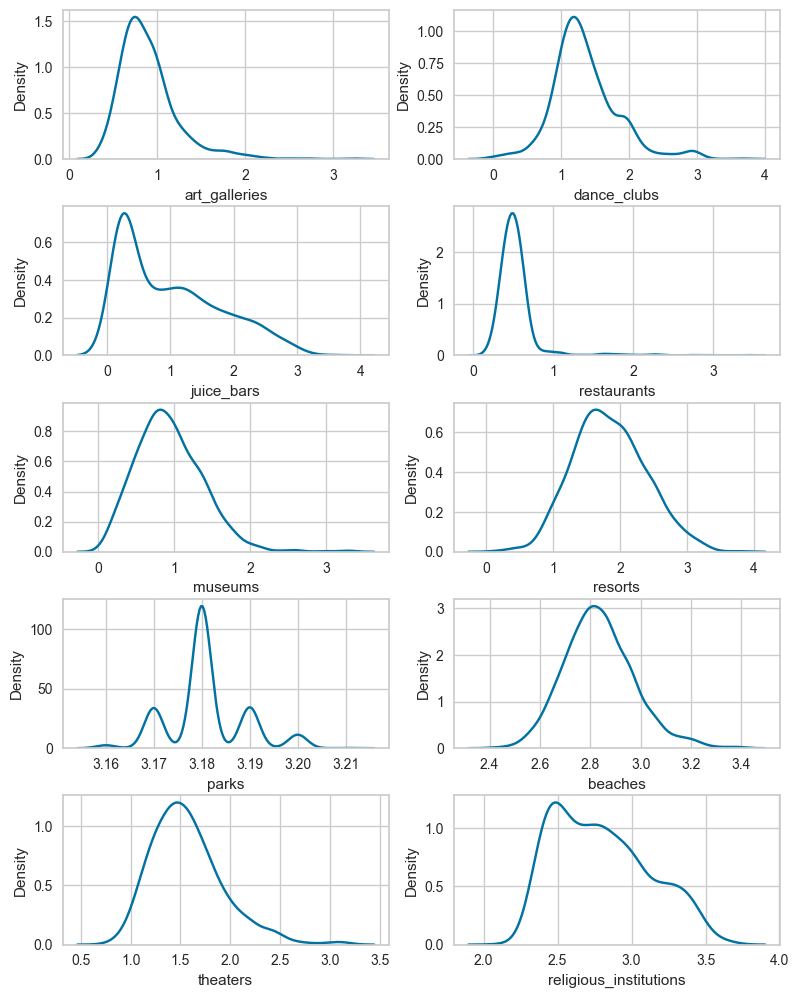

In [9]:
df_columns = ['art_galleries','dance_clubs','juice_bars','restaurants','museums','resorts','parks','beaches','theaters','religious_institutions']
fig, axes = plt.subplots(5, 2,figsize=(8,10))
fig.tight_layout()
count = 0
for i in range(5):
    for j in range(2):
        sns.kdeplot(data[df_columns[count]],ax = axes[i,j])
        count+=1
plt.show()

- From the above plots, it's observed that all the features need have some outliers in their distribution. As we observed in the previous part.
- The density plots reveal that most categories, like **art galleries**, **dance clubs**, **juice bars**,**museums**, and **restaurants**, are right-skewed, the peak of the graph lies to the left side of the center and potential outliers on the end. 
- Categories like **resorts**, **parks**, **beaches**, and **theaters** display more symmetric normal distributions.

#### Correlation analysis

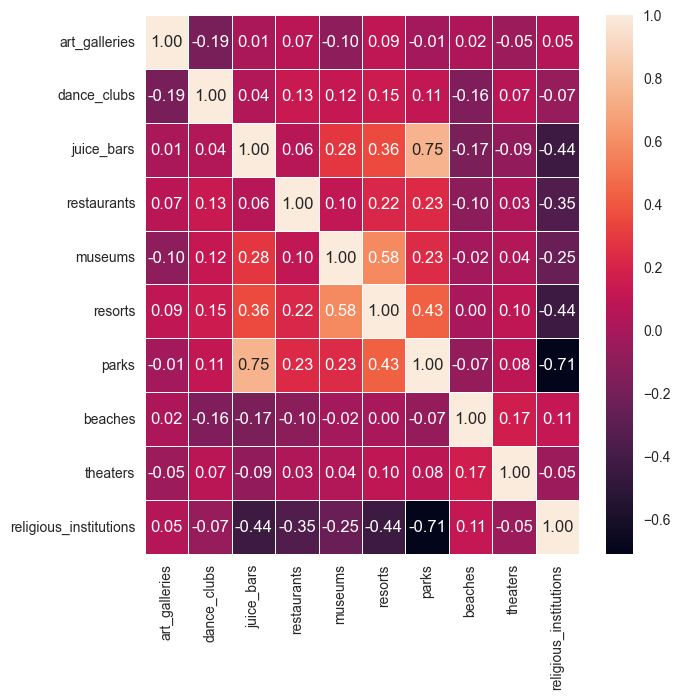

In [10]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.5, fmt=".2f")
plt.show()

- Positive Correlations
    - The most strong positive correlation is between **juice_bars** and **parks**, these have a strong positive correlation of 0.75. Suggesting that people users that rate one good tend to do the same with the other.
    - Another positive relation would be the one between **museums** and **resorts** (0.58). Might indicate that visitors have a profile of cultural and luxury experiences together.
    - And the relation between **resorts** and **parks** of 0.43. It could indicate that visitors can enjoy chill experiences.

- Negative Correlations
    - On the hand, we have the negative relation between **parks** and **religious_institutions** with -0.71, that could indicate us a divergence of these attributes.
    - And other relations to pay attention to are the relations between **juice_bars**, **resorts** and **restaurants** with **religious_institutions**, -0.44, -0.44 and -0.35, respectively.

# Clustering 1 -- Plain Data
---


<div class="alert alert-block alert-warning"> 
<b>Choice of Algorithm</b>: 
Given the situation in the pitch and the results from the above analyses. Which algorithm (chosen from those discussed in the lectures) would YOU choose for the clustering? Explain!
    
(Choice + 1-3 bullet points)
</div>

**Hierarchical Clustering**

* Since there are a **considered outlier number**, this partially discards k-Means, as it is highly sensitive to outliers (an outlier can drag the centroids and significantly affect the cluster allocation). So Hierarchical Clustering generates dendograms that show how points are grouped at different levels, this is especially useful in this dataset since the outliers can influence in the clustering algorithm.
* We **don't have to predefine a specific number of clusters**. Unlike methods such as k-Means or DBSCAN, we do not need to specify the number of clusters beforehand. This is an advantage in this case as we do not have a clear idea on how many clusters are in the data. We can inspect progressive joints to make a more informed decision.

* **More flexibility with metrics and linkage criteria**. We can use metrics such as Euclidean or Manhattan distance, and linkage criteria (complete, average, etc.) that are less sensitive to outliers than single linkage.

<div class="alert alert-block alert-warning"> 
<b>Clustering with k-Means</b>: 
For the sake of the exam, use k-Means for the clustering (even if above you argumented for a different algorithm). Conduct ALL necessary steps to create a most helpful and meaningful clustering and discuss its quality. Use appropriate diagrams to demonstrate the results. 
    
(Commented code + text/bullet points, add cells)
</div>

#### KMeans Clustering

In [11]:
# Functions to simplify the future code

def getKMeans(k, n_init=20, max_iter=50):
    """
        The function returning KMeans

        param n_nit: number of times the KMeans algorithm will run with different initializations (sometimes get stuck in local optims)
        param max_iter: maximum number of iterations the algorithm will perform
        random_state: setting this variable to 1 so it is replicable in an other device    
    """

    return KMeans(n_clusters = k, random_state = 1, n_init = n_init, max_iter = max_iter)

def sihouetteVisualizer(df, k):
    """
        The function takes a df and a Sklean clusterer to fit the Silhouette visualizer and plot it
    """
    model = SilhouetteVisualizer(k)
    model.fit(df)
    model.finalize()

def KMeansSihouettePlot(dataframe, k_max):
    """
        The function takes a df and the maximum k to plot.
        It calculates KMeans for different cluster size and plot their sil_scores 
    """  
    sil_scores = []

    for n in range(2, k_max):
        kmeans = getKMeans(n)
        cluster_labels = kmeans.fit_predict(dataframe)
        sil_scores.append(silhouette_score(dataframe, cluster_labels))
        plt.plot(range(2,n+1), sil_scores)
        plt.title("Silhouette Coefficient Scores")
        plt.xlabel(f"Number of k")
        plt.ylabel("Silhouette Coefficient Score")

First, we transform the data into a standarized format, so all the instances are scaled using the standard scaler to ensure alignment.

In [12]:
# Scaling the data
scaler = StandardScaler()
data_sc= scaler.fit_transform(data)
data_sc = pd.DataFrame(data_sc, index=data.index, columns=data.columns)

Now we find the suitable number of k clusters with the silhouette coefficient plot.

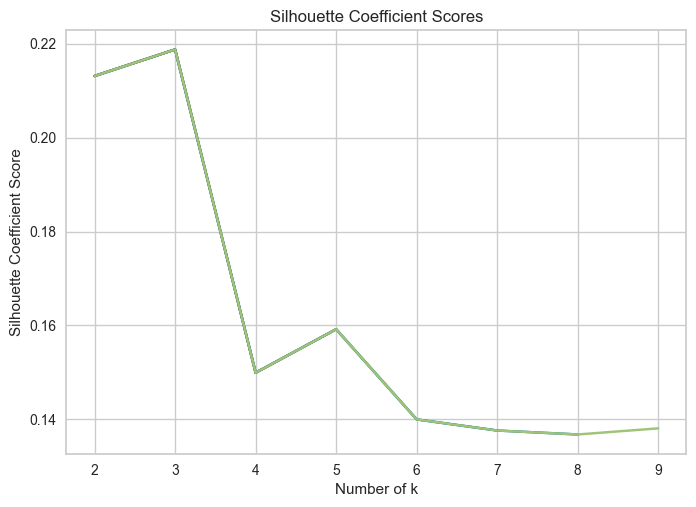

In [13]:
KMeansSihouettePlot(data_sc,10)

- The top silhouette score is found in three clusters. As we can observe in this case, the cluster structure is very weak or we can consider that there is no structure at all, and clusters are not very separated between them.
- In overall, using any of k means in this algorithm would be useless, since none of them surpass the threshold of 0.25, that is even a weak structure.

c:\Users\Pablo\Desktop\Mathematics and Multivariate Statistics\envMMS\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Number of samples in each cluster
0
1    607
2    352
0     21
Name: count, dtype: int64


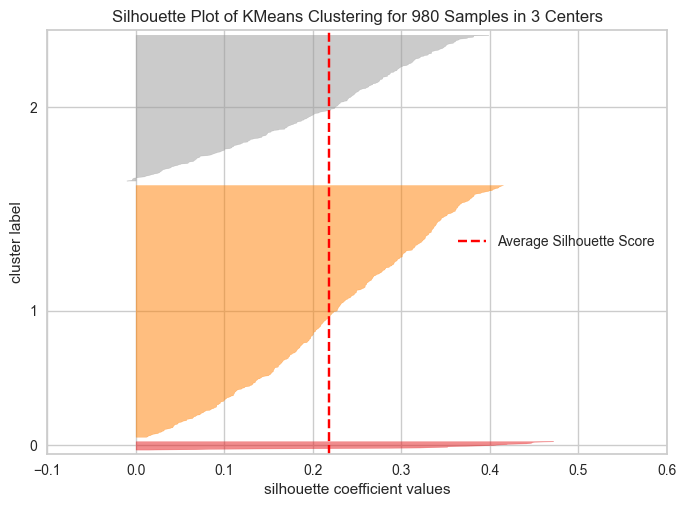

In [14]:
kmeans = getKMeans(k=3)
cluster_labels = pd.DataFrame(kmeans.fit_predict(data_sc))
sihouetteVisualizer(data_sc, kmeans)

#Number of samples in each cluster
print('Number of samples in each cluster')
print(cluster_labels.value_counts())

- Cluster 2 and 1 have positive values, but they don't have the best shape, indicating moderate cohesion.
- And Cluster 0 only has a few samples, but it has the best sil_score among the others,probably because of the first fact.
- The performance of KMeans has been terrible, maybe because the distance between the datapoints is very tiny, in other words no clear boundaries.

#### Hierarchical

First we are going to plot directly diverse linkage options to see which one suits good with the df with the distance calculted by 'eucliden', then 'cosine', and last 'manhattan'.

Since there are too many leaves to inspect visually, we do a proning to make things more manageable. The pruned nodes are chosen using 'lastp', which picks the latest non-singleton nodes and leaf nodes. The default setting for "p" helps keep the structure intact while making visual inspection easier. This keeps clusters from becoming too detailed and hard to work with. Leaf node labels are shown without parentheses because they only represent a single leaf. Non-singleton nodes, however, include parentheses to show how many leaves they contain.

##### Single

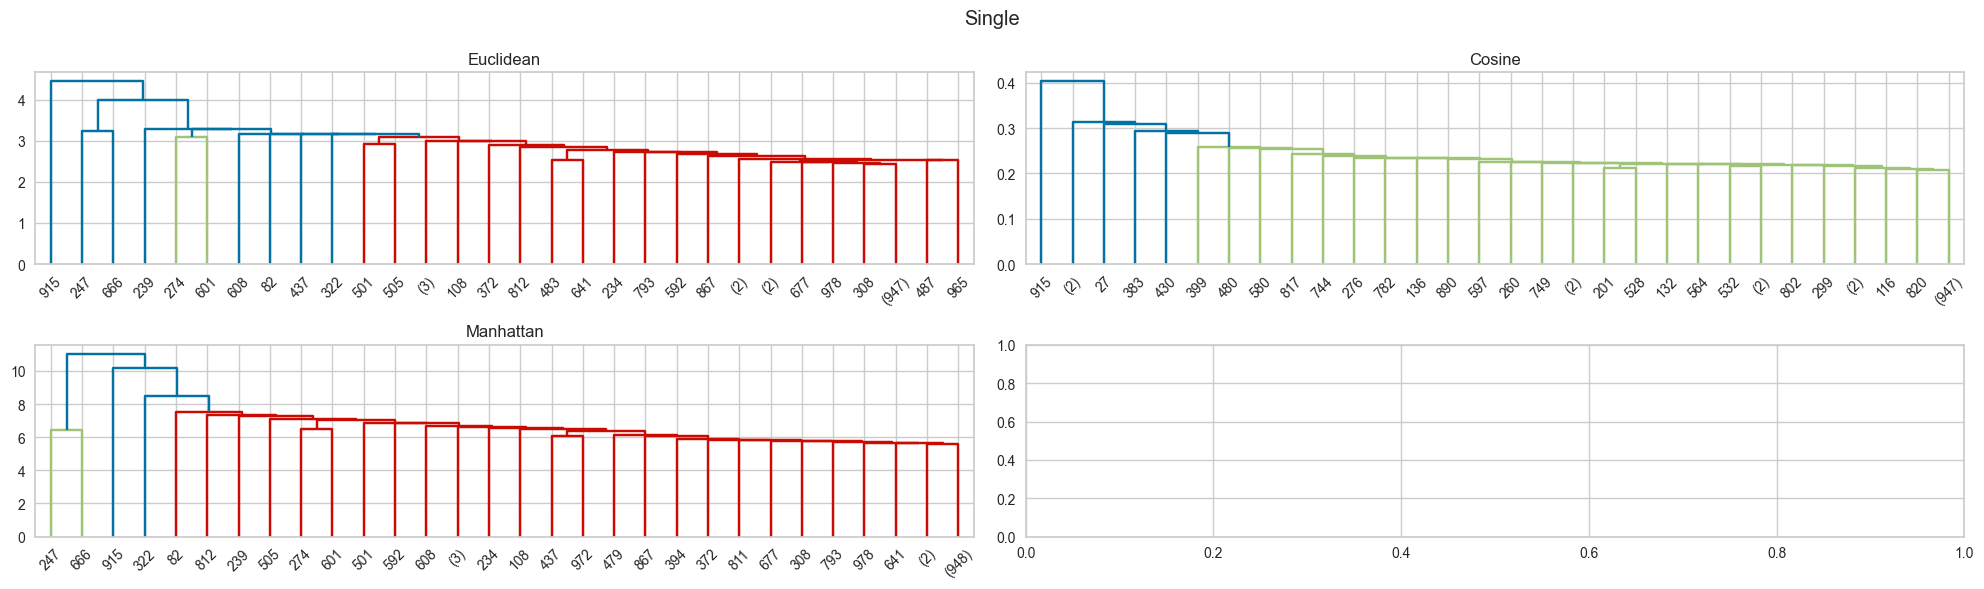

In [15]:
fig, axes = plt.subplots(2, 2,  figsize=(20,6))

mergings = linkage(data_sc,method='single',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,0])
axes[0,0].set_title('Euclidean')

mergings = linkage(data_sc,method='single',metric='cosine')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,1])
axes[0,1].set_title('Cosine')

mergings = linkage(data_sc,method='single',metric='cityblock')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,0])
axes[1,0].set_title('Manhattan')

fig.suptitle('Single')
fig.tight_layout()
plt.show()

These dendograms of **Single** linkage show us a long irregular structure, caused by the chaining effect. This happens since the distance between merged nodes are consistently small, making it difficult to define meaningful clusters. If we apply a cutoff, we create one huge cluster with several tiny clusters with single instances. Therefore, this method don't hold practical value.

#### Average

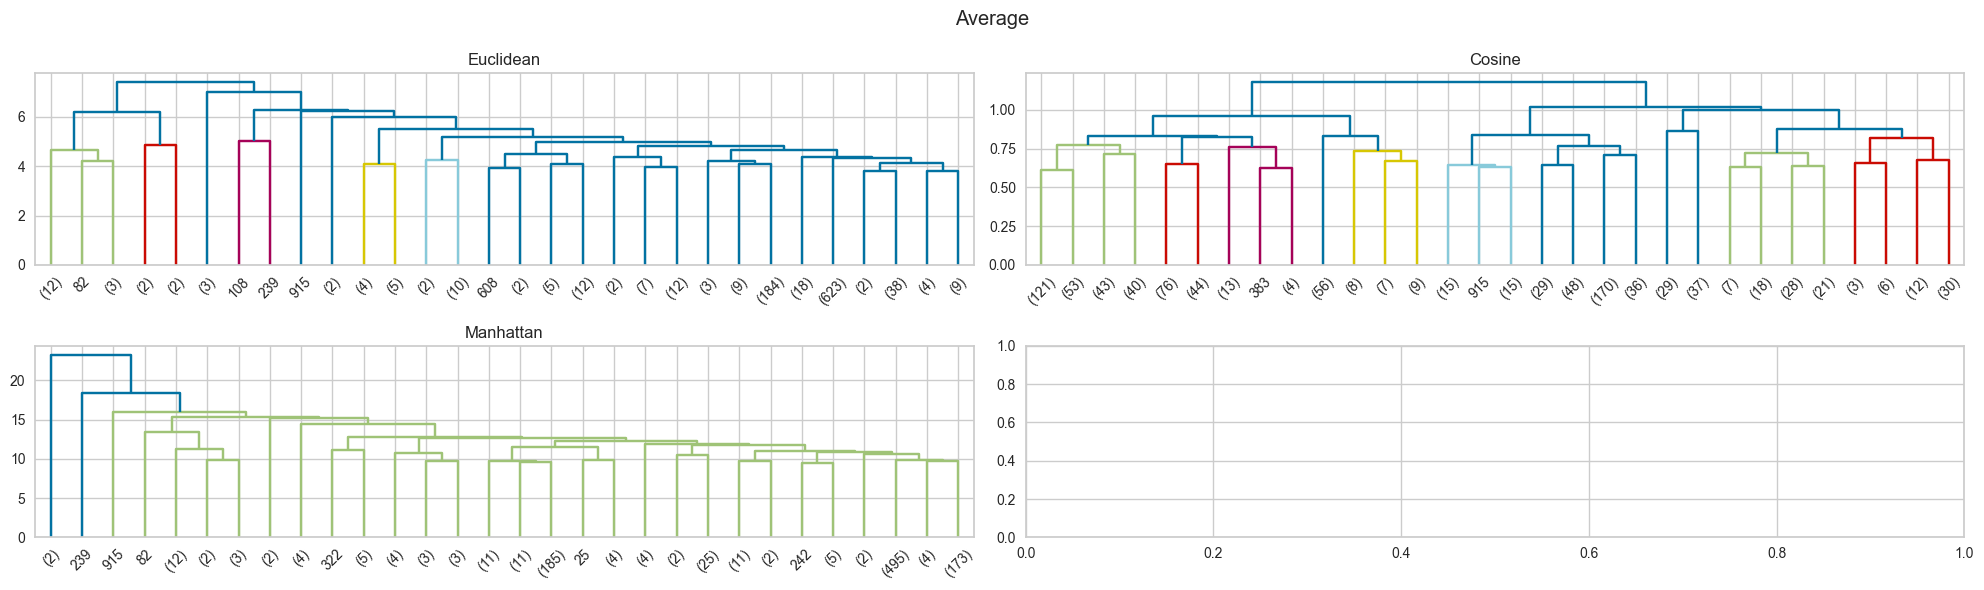

In [16]:
fig, axes = plt.subplots(2, 2,  figsize=(20,6))

mergings = linkage(data_sc,method='average',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,0])
axes[0,0].set_title('Euclidean')

mergings = linkage(data_sc,method='average',metric='cosine')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,1])
axes[0,1].set_title('Cosine')

mergings = linkage(data_sc,method='average',metric='cityblock')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,0])
axes[1,0].set_title('Manhattan')

fig.suptitle('Average')
fig.tight_layout()
plt.show()

**Average** linkage dendograms using Euclidean and Manhattan distances also show similiar pattern as the before linkage, so there isn't a good cluster structure. Despite this, applying the cosine metric creates short branches, causing leaves to look similar, suggesting a weak structure.

#### Complete

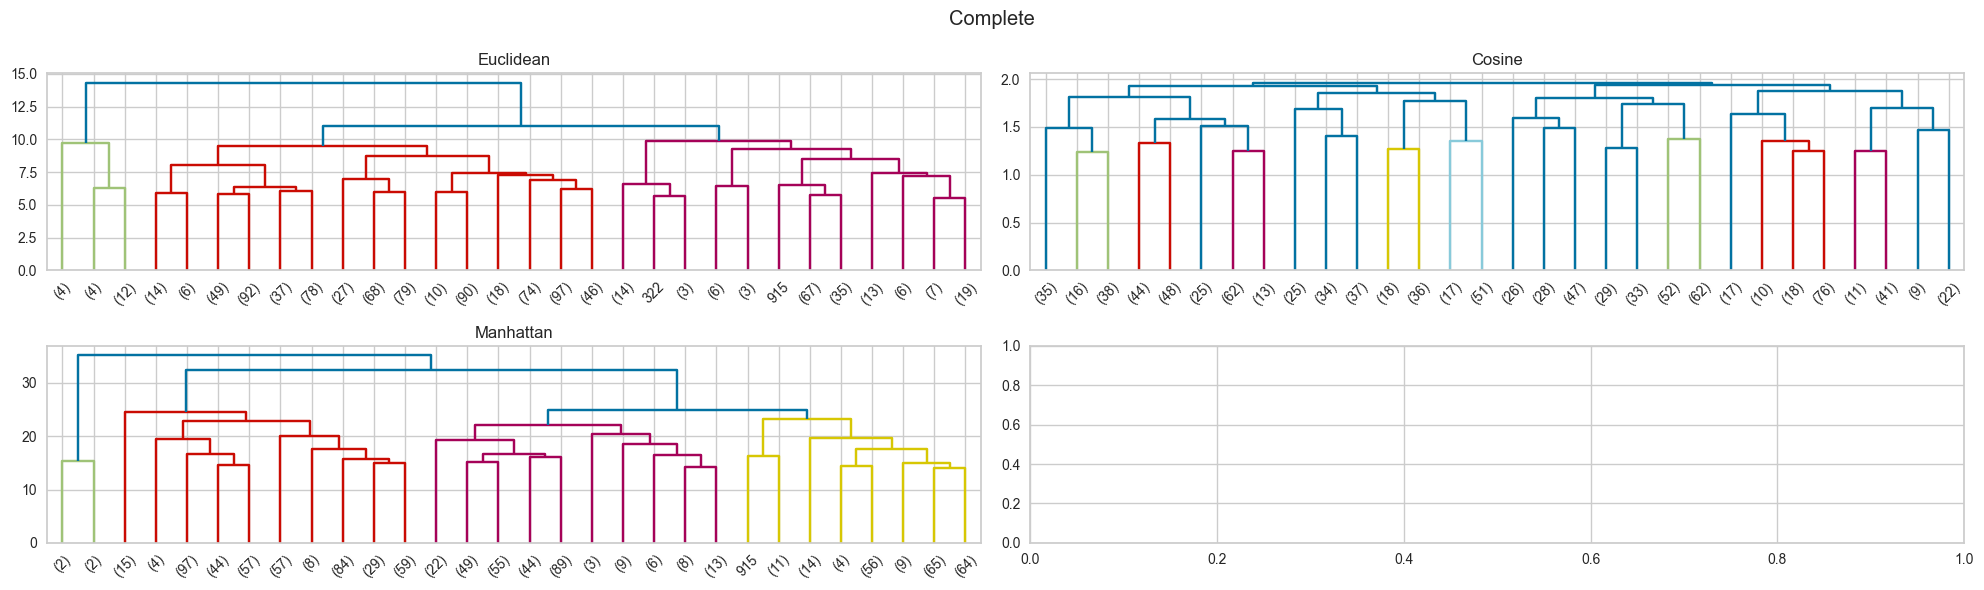

In [17]:
fig, axes = plt.subplots(2, 2,  figsize=(20,6))

mergings = linkage(data_sc,method='complete',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,0])
axes[0,0].set_title('Euclidean')

mergings = linkage(data_sc,method='complete',metric='cosine')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,1])
axes[0,1].set_title('Cosine')

mergings = linkage(data_sc,method='complete',metric='cityblock')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,0])
axes[1,0].set_title('Manhattan')

fig.suptitle('Complete')
fig.tight_layout()
plt.show()

Finally, with the **Complete** linkage appears in all metrics both problems we have observed previously but not so extreme. We can observe a little bit of overlapping in the euclean and manhattan metrics and short branches.

#### Ward - Euclidean

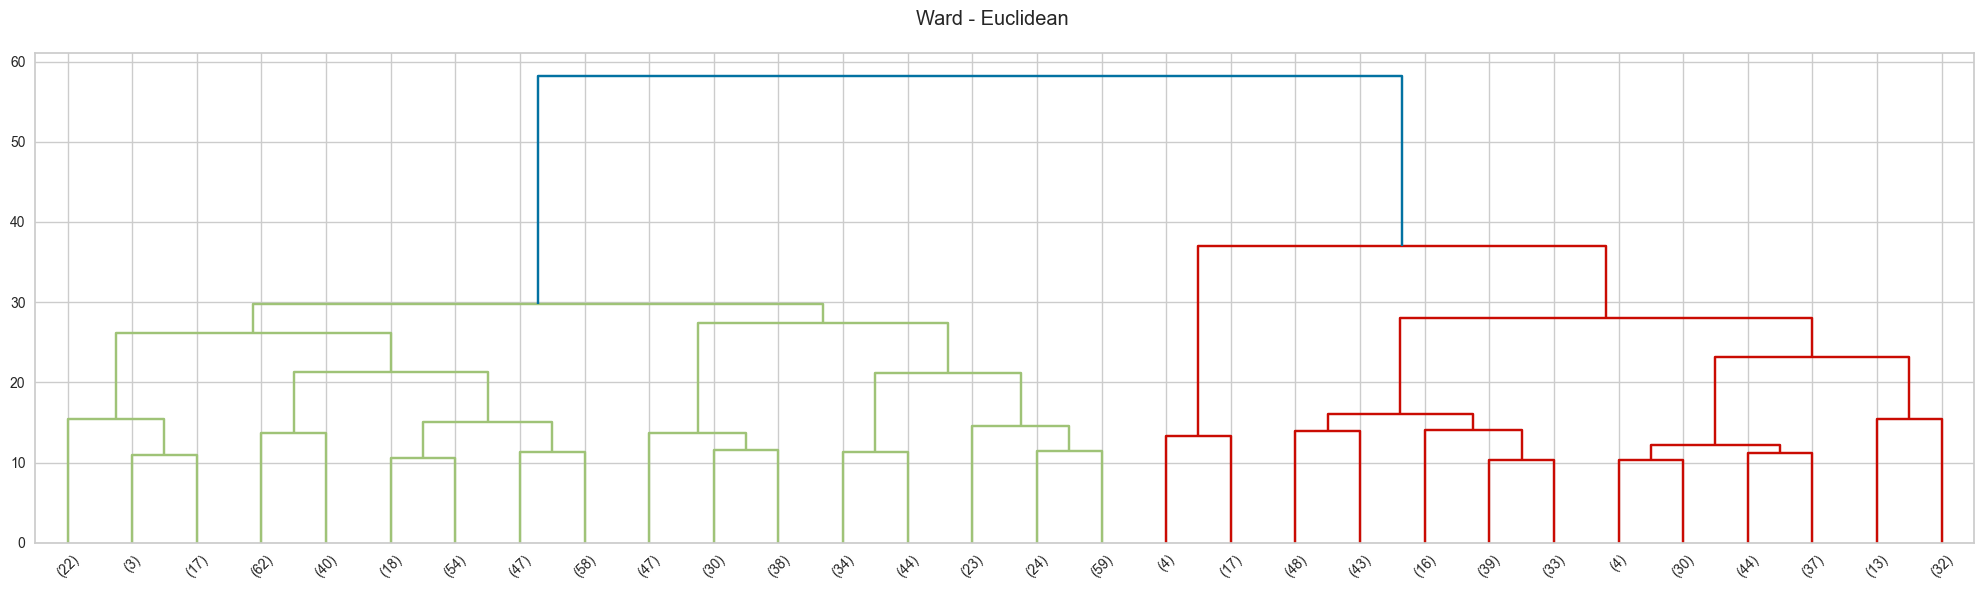

In [18]:
fig, axes = plt.subplots(1, 1,  figsize=(20,6))
mergings = linkage(data_sc,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
fig.suptitle('Ward - Euclidean')
fig.tight_layout()
plt.show()

In contrast, **Ward** linkage with the **Euclidean** metric produces two nodes with relatively short branch lengths, showing that the leaves within each node are similar. Meanwhile, the nodes themselves are connected by longer branches, indicating a clear dissimilarity between them and suggesting a good structure. This results in distinct clusters that aren’t dominated by a few individual instances.

Because of these reasons it has the best structured of any dendogram, so that is why it is selected.

In [19]:
#Calculating the number of samples in each cluster
agg = cluster.AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
labels = agg.fit_predict(data_sc)
data_HCA = data_sc.copy()
data_HCA["cluster"] = labels
print(data_HCA["cluster"].value_counts()/data_HCA["cluster"].value_counts().sum())

cluster
1    0.632653
0    0.367347
Name: count, dtype: float64


And as we can observe the cluster 1, contains the 63.26% of the dataset, nearly 2/3. So the cluster 1 is twice nearly twice the cluster 0 in number of observations.

# Dimensionality Reduction
---
<div class="alert alert-block alert-warning"> 
<b>PCA</b>: 
Use PCA to transform the dataset. Analytically choose a reasonable number of components. Report the preserved variance.

(Commented code + text/bullet points, add cells)
</div>

In [20]:
#Transforming the data scalared into PCA
pca=PCA() 
pca_transformed=pca.fit_transform(data_sc)
data_pca=pd.DataFrame(pca_transformed, index=data_sc.index)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,2.407573,-0.073039,0.185360,0.162400,-0.840662,0.920314,0.414859,-0.089752,0.539656,-0.535184
1,5.311237,-0.022500,0.654836,-0.034982,-0.225704,1.902050,0.303242,-0.134123,0.489292,1.182705
2,-0.807839,-1.776951,-0.850661,0.750597,-0.646349,-0.300083,-0.155406,-1.175285,-0.014644,-0.133186
3,-1.065346,0.856401,0.958654,0.126355,-1.201367,-0.782680,0.949553,-0.308888,0.321027,0.235747
4,0.987246,-0.076777,0.738679,-0.849947,0.849537,-1.401990,-0.568379,-0.209762,-0.381479,-0.229009


[ 29.77504407  42.40298375  54.73397667  65.37868071  75.57687727
  83.65669366  90.7012403   95.30112707  98.58996912 100.        ]


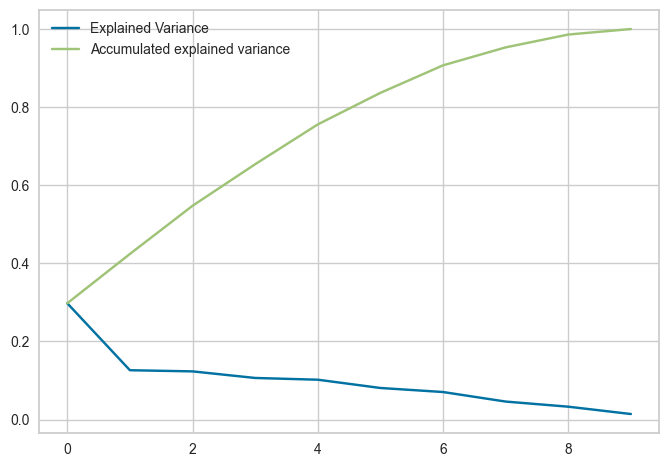

In [21]:
#Ploting the variance explanation
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance, label='Explained Variance')
plt.plot(np.add.accumulate(explained_variance),label='Accumulated explained variance')
plt.legend()

print(np.add.accumulate(explained_variance*100))

- 83.65% of the variance is accounted for by the first 6 principal components.
- A big share (42.4%) is held by the variance of the first two principal component.
- So the question is to choose between 5 elements or 6 elements. With 6 elements you surpass the threshold of 80%, but decreasing by one you have a very good percentage of the variance with 75.57%, and you can reduce by a half the elements. The difference of increasing one component is only 8% and the threshold is not surpass only by 5%.
- So I am going to select 5 principal components to be retained. 

In [22]:
#Selecting the 5 principal components
data_pca = data_pca.iloc[:,:5]

# Clustering 2 -- PCA-transformed Data
---
<div class="alert alert-block alert-warning"> 
<b>Clustering with k-Means</b>: 
On the PCA-transformed data, conduct ALL necessary steps to create a most helpful and meaningful clustering and discuss its quality. Use appropriate diagrams to demonstrate the results. 

(Commented code + text/bullet points, add cells)
</div>

PCA - KMeans

Again, we find the suitable number of k clusters with the silhouette score but now with the PCA

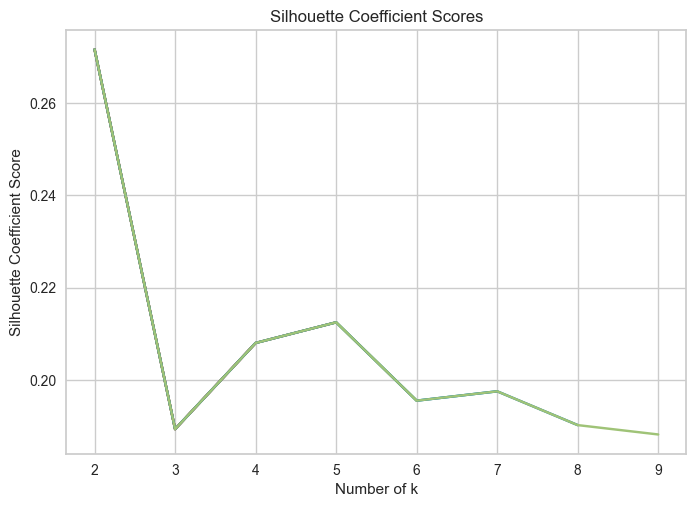

In [23]:
KMeansSihouettePlot(data_pca,10)

- In this case the most suitable k means is 2. This would explain why one of the previous clusters with k = 3, had only a few samples. And now, since we have applied the PCA that few samples had reduce their variance and distance.
- But on the other hand, it has increased the silhouette score up to 0.27 and has surpassed the previous threshold, but it is still a very weak structure

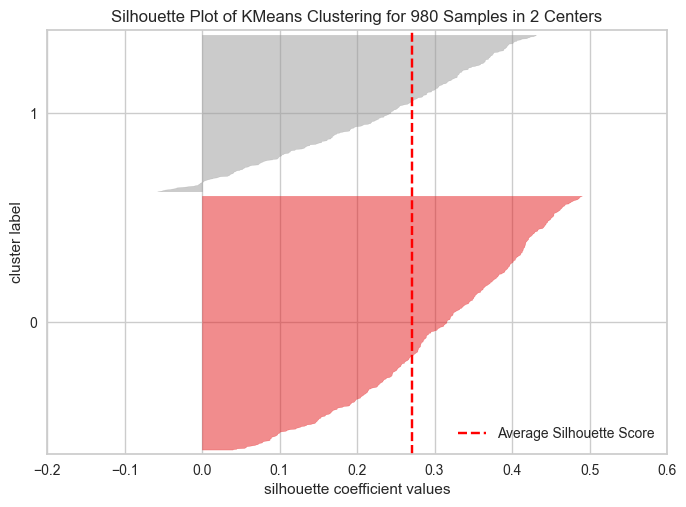

In [24]:
kmeans = getKMeans(k=2)
cluster_labels = kmeans.fit_predict(data_pca)
sihouetteVisualizer(data_pca, kmeans)

- The distribution of the cluster members remains quite similar to before PCA. The only modification would be the cluster that has disappear due to the k=2.
- However, both cluster still don't have the best shape, indicating moderate cohesion.
- To sump up, applying KMeans with PCA is still performacing terrible due to the previous reasons.

<div class="alert alert-block alert-warning"> 
<b>Clustering Comparison</b>: 
Compare the two clusterings (on the plain data and on the PCA-transformed data) with respect to cluster memberships.
    
(Commented code + text/bullet points, add cells)
</div>

#### PCA - Hierarchical

##### Single

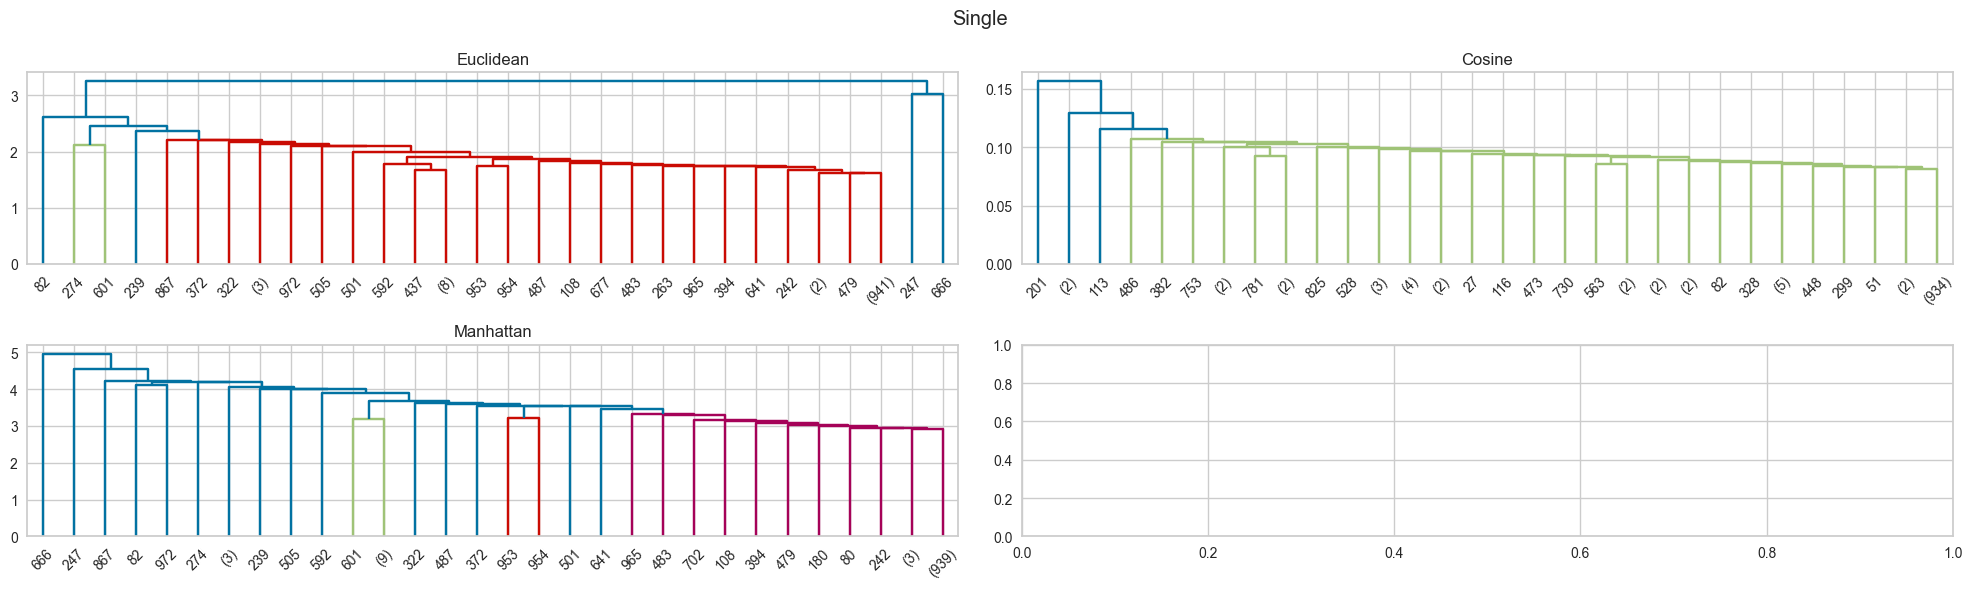

In [25]:
fig, axes = plt.subplots(2, 2,  figsize=(20,6))

mergings = linkage(data_pca,method='single',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,0])
axes[0,0].set_title('Euclidean')

mergings = linkage(data_pca,method='single',metric='cosine')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,1])
axes[0,1].set_title('Cosine')

mergings = linkage(data_pca,method='single',metric='cityblock')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,0])
axes[1,0].set_title('Manhattan')

fig.suptitle('Single')
fig.tight_layout()
plt.show()

As expected, in this case the **Single** linkage still have irregular structure and, furthermore the chaining effect has slightly worsened.

##### Average

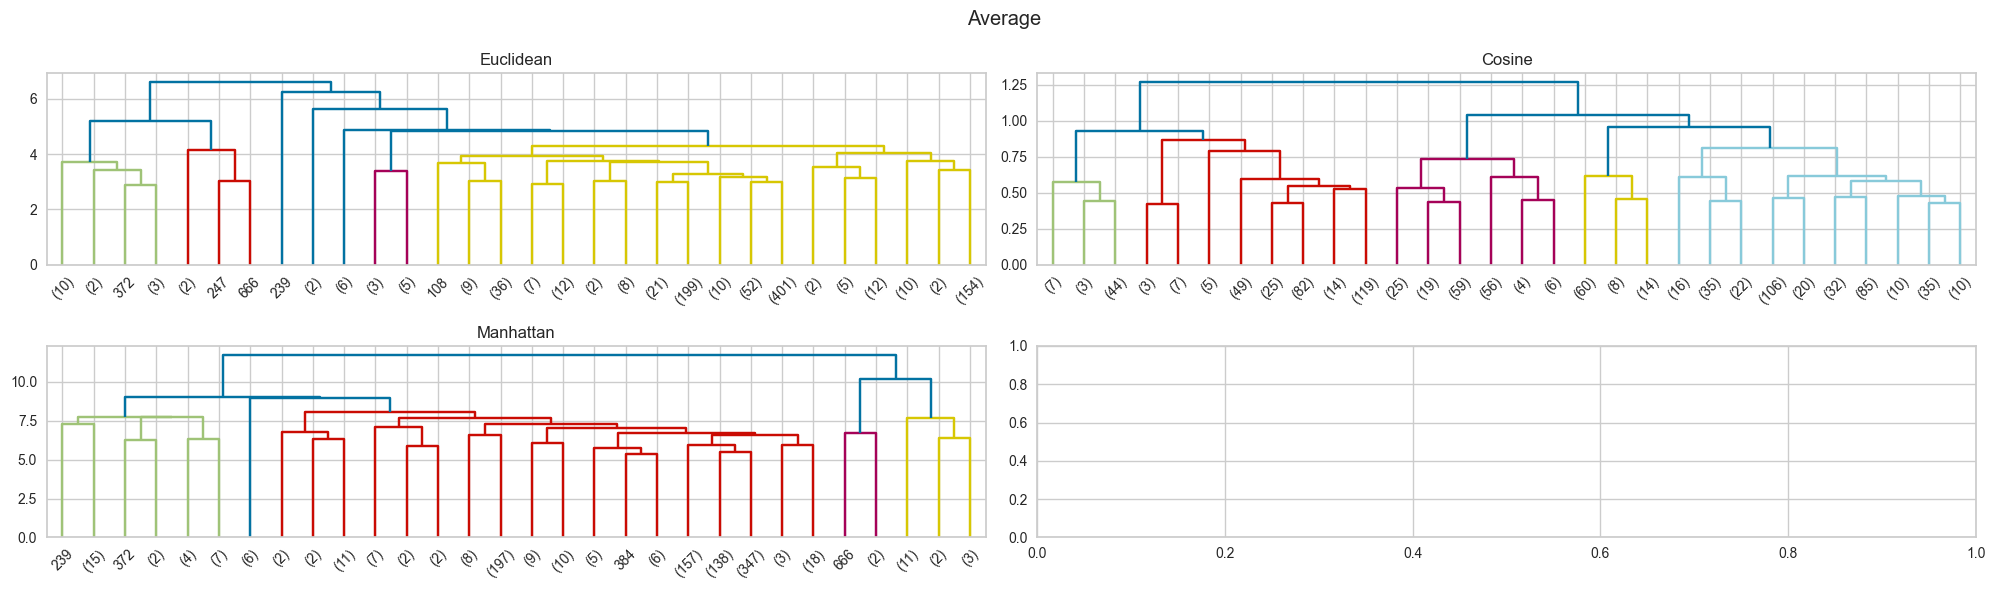

In [26]:
fig, axes = plt.subplots(2, 2,  figsize=(20,6))

mergings = linkage(data_pca,method='average',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,0])
axes[0,0].set_title('Euclidean')

mergings = linkage(data_pca,method='average',metric='cosine')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,1])
axes[0,1].set_title('Cosine')

mergings = linkage(data_pca,method='average',metric='cityblock')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,0])
axes[1,0].set_title('Manhattan')

fig.suptitle('Average')
fig.tight_layout()
plt.show()

In this case, the PCA has slightly improved the performance of **Average** linkage. But it still have the previous problems of short branches and overlapping.

##### Complete

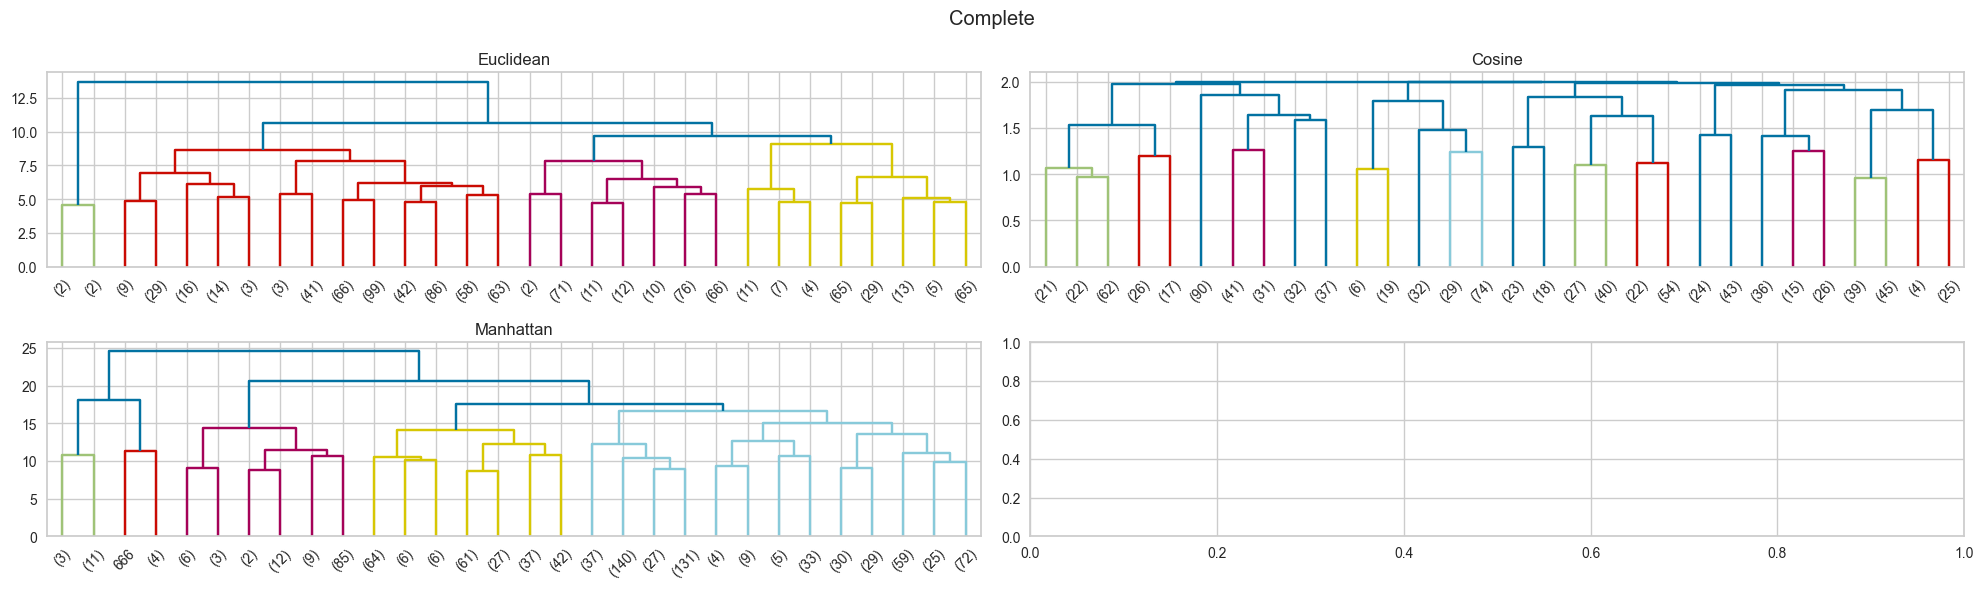

In [27]:
fig, axes = plt.subplots(2, 2,  figsize=(20,6))

mergings = linkage(data_pca,method='complete',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,0])
axes[0,0].set_title('Euclidean')

mergings = linkage(data_pca,method='complete',metric='cosine')
dendrogram(mergings,truncate_mode='lastp',ax=axes[0,1])
axes[0,1].set_title('Cosine')

mergings = linkage(data_pca,method='complete',metric='cityblock')
dendrogram(mergings,truncate_mode='lastp',ax=axes[1,0])
axes[1,0].set_title('Manhattan')

fig.suptitle('Complete')
fig.tight_layout()
plt.show()

Exactly the same as the previous linkage, slightly improved performance but still have the same problems as before PCA.

##### Ward - Euclidean

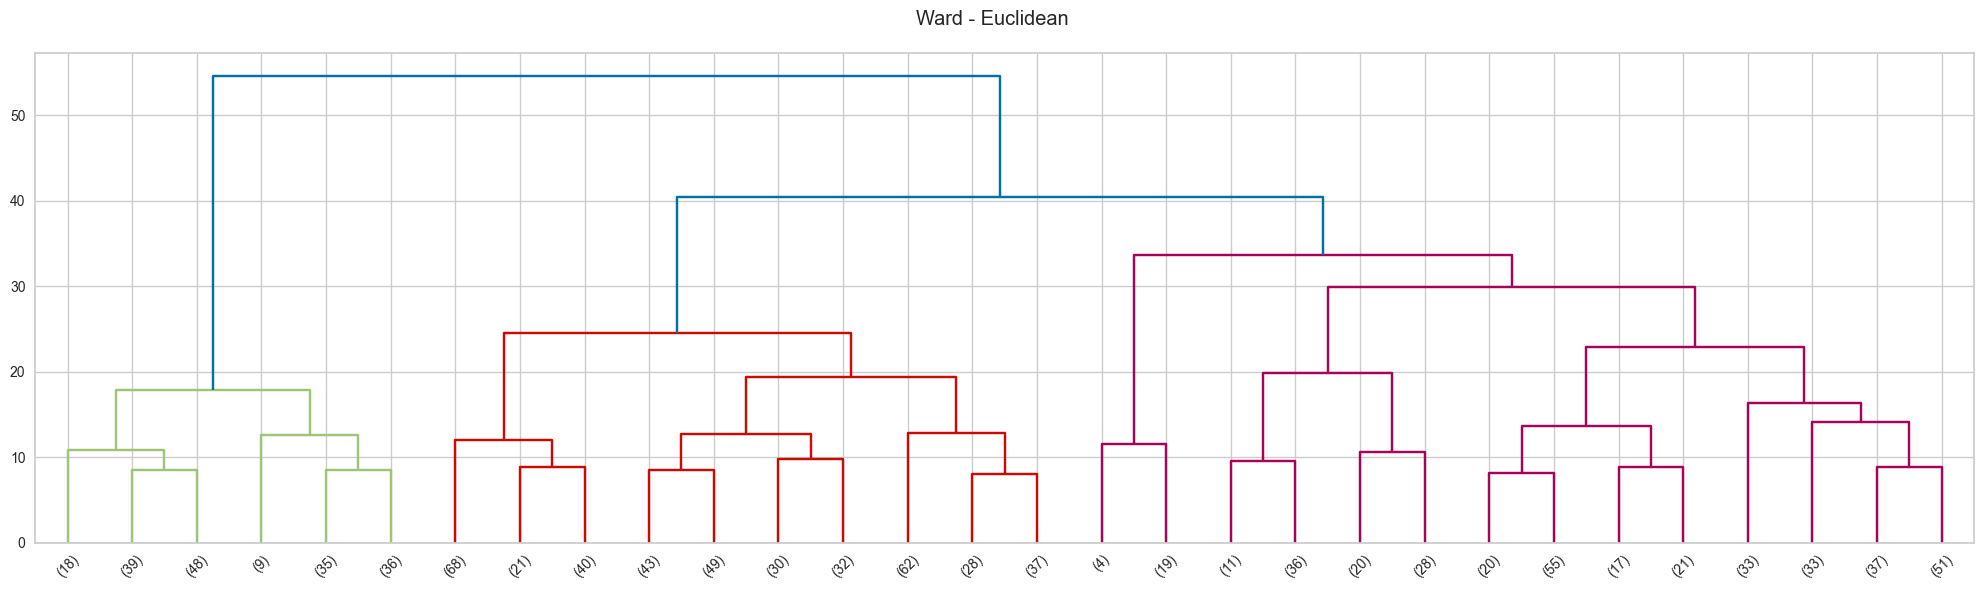

In [28]:
fig, axes = plt.subplots(1, 1,  figsize=(20,6))
mergings = linkage(data_pca,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
fig.suptitle('Ward - Euclidean')
fig.tight_layout()
plt.show()

And finally good news, thanks for applying the PCA to the dataset we have discovered a new cluster. 

And the structure has been improved as well, short branches (similar samples), and nodes connected by long branches, showing dissimilarity.

In [29]:
#Calculating the number of samples in each cluster
agg = cluster.AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
labels = agg.fit_predict(data_pca)
data_HCA = data_sc.copy()
data_HCA["Cluster"] = labels
print(data_HCA["Cluster"].value_counts()/data_HCA["Cluster"].value_counts().sum())

Cluster
2    0.418367
0    0.392857
1    0.188776
Name: count, dtype: float64


As we can see, the largest cluster is the 2, with 41.83% of the samples, and followed by the 0, with nearly the 40%. This information shows us, that the 3 clusters have a good number of observations and there is no a huge one.

# Interpretation
---
<div class="alert alert-block alert-warning"> 
<b>Cluster Descriptions</b>: 
Create tables and visuals for the description of clusters through feature. Interpret the results for the usecase.
    
(Commented code + text/bullet points, add cells)
</div>


Cluster
2    410
0    385
1    185
Name: count, dtype: int64


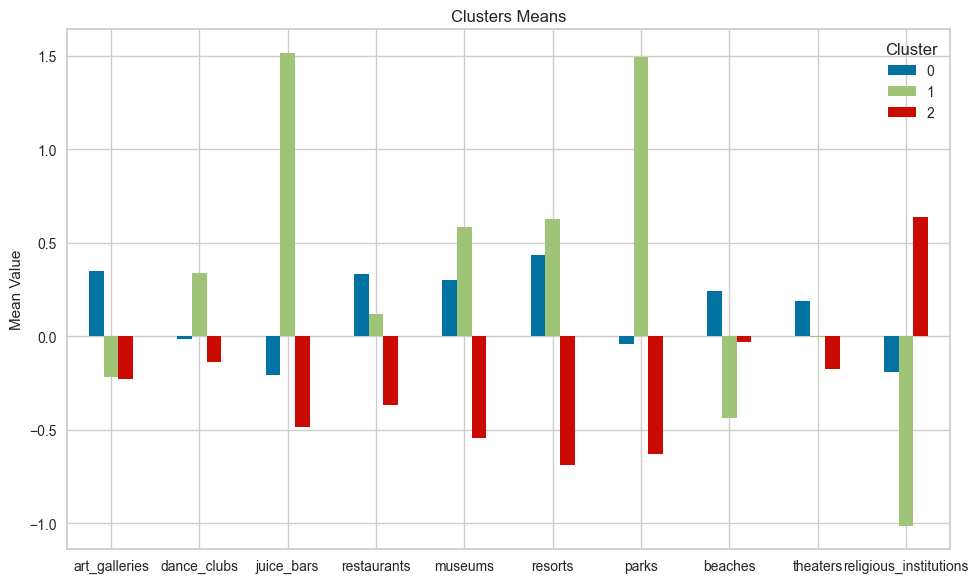

In [30]:
# Copying the cluster labels to the main dataframe and doing the meaning of the clusters
data_cluster = data_sc.copy()
data_cluster['Cluster'] = labels
print(data_cluster['Cluster'].value_counts())
data_cluster = data_cluster.groupby('Cluster').mean()

#Plot
data_cluster.T.plot(kind='bar', figsize=(10, 6))
plt.title('Clusters Means')
plt.ylabel('Mean Value')
plt.legend(title='Cluster')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

#### Interpretation

##### Cluster 2 (Red)
- This cluster has strong negative means in many categories, such **juice bars**, **restaurants**, **museums**, **parks** and **beaches**, indicating a general disinterest to these kind of places. Also in the other categories, has negative relation.
- Except for **religious institutions**, it shows a strong positive mean for this category, indicating its importance for this types of places.

##### Cluster 1 (Green)
- This cluster has very strong positive means in **juice_bars** and **parks**. Furthermore, is has strong relations with **museums** and **resorts**, and it is the only cluster of the three that has a positive mean in the attribute **dance_clubs**.
- On the other hand, they have a very negative relation with **religious_institutions**, and a less negative relation with **beaches**, suggesting that they are not very comfortable with this spots.

##### Cluster 0 (Blue)
- This cluster has very average means in their features. It has positive relations in **art_galleries**, **restaurants**, **musseums** and **resorts** among others, but they are not so strong as the previous clusters with their features.
- This cluster doesn't have characteristics as marked as the rest of the clusters. 

# CONCLUSIONS
---

<div class="alert alert-block alert-warning"> 
<b>Conclusions</b>: 
Present conclusions etc. (See Task 7). Group your bulletpoints to respective headlines.
    
(Text/bullet points, this cell)
</div>


#### Summary of the clusters in HCA (Ward-Euclidean) with PCA
- Cluster 0. Average tourist that are interested in all the landmarks of the country are enjoy visiting all the famous spots and they are not very particular interested in specific places or they don't try to avoid certain venues. The second larger cluster with 385 observations.

- Cluster 1. Visitors who enjoy social and recreational activities. The interest in dance clubs and juice_bars indicates a preference for nightlife and social activities. And they are not very interested in culture activities such as the religious_insitutions, theaters or art galleries. 

- Cluster 2. Tourists that are focus on religious or spiritual purposes and are less interested in exploring general recreational and social sites. This is most larger cluster with 410 samples.

- This summary matches perfectly with the previous correlation matrix where we observed the negative correlation between **religious_insitutions** and **juice_bars**, **parks** nad **resorts**. And the strong positive correlation of **parks** and **juice_bars**

#### Original Plan
- The original plan was to identify distinct profiles of travelers based on their preferences for various types of destinations so we are enable to create more personalized experiences and recommendations causing an improvement in the customer engagement. And thanks to the HCA cluster, we have identify 3 different profiles of tourists.

- And now we can do personalised recommendations to the profiles **Average**, **Nightlife** and **Spiritual**.

#### Generated Value
- We have identified that the **Spiritual** profile values a lot of the religious temples, but on other hand, it doesn't get interested or like the other categories.
- The **Nightlife** is not very keen on going to the parks or beaches, it prefers to go to the theaters or resorts, to be more entertained.
- **Average** profile would be the average person that is interested in all the categories except for the religious institutions and juice_bars.

- With this information the organization can improve the resource allocations to events or strategic venues and improve the experiences of the future tourists based on the preferences.

#### Course of action
- Develop specialized travel packages for each cluster, such as nightlife-centered and spiritual tours.
- Focus advertising efforts by channeling social media campaigns towards travelers fitting each profile, with visual content reflecting their cluster’s interests.
- Dynamic pricing by identifying peak interests and seasons for each cluster, allowing for more strategic pricing or bundles.
- Investigate wich one of the profiles is most valuable in terms of how much money the spend on the venues or in the country. Or by counterpart who are less problematic, maybe the profile Nightlife spends more money but is more problematic due to the alcoholic consumption.

#### Limitations
- The reliance on East Asian destination preferences may not generalize well to other regions.
- The dataset captures only ten types of destinations, it goof be good improvement to find more reviews in different kind of venues.
- Preferences and interests may evolve over time.

#### Reflect the original task
- The goals were achievable and realistic but could benefit from refinements.

# Future Work
---

<div class="alert alert-block alert-warning"> 
<b>Future Work</b>: 
Present three ideas for future work!
    
(3 bullet points, this cell)
</div>


- Add more features so we can support a richer set of clusters and subclusters.
- As we can observed in the distribution plot, the dataset had outliers and in the future work we should apply an outlier treatment, and watch the differences while clustering.
- Making hypothesis tests to realize the significant features, so we can cluster them.